In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.style.use('seaborn')

Questions to answer:
    - what variable is the most significant to predict the house prices?
    - how location affects house prices? (zipcodes)
    - homes with a large lot vs homes with a large sqft of the home?
    - how does waterfront homes affect the price? (assumption: small waterfront homes are incredibly expensive)
    - look at the price vs date: is the market growing?
    - extra: take the rows where renovation data exists and see how it affect the price based on the subset

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
type(df.waterfront.loc[0])

numpy.float64

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Obvious things to do: turn 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1143973c8>,
      dtype=object)

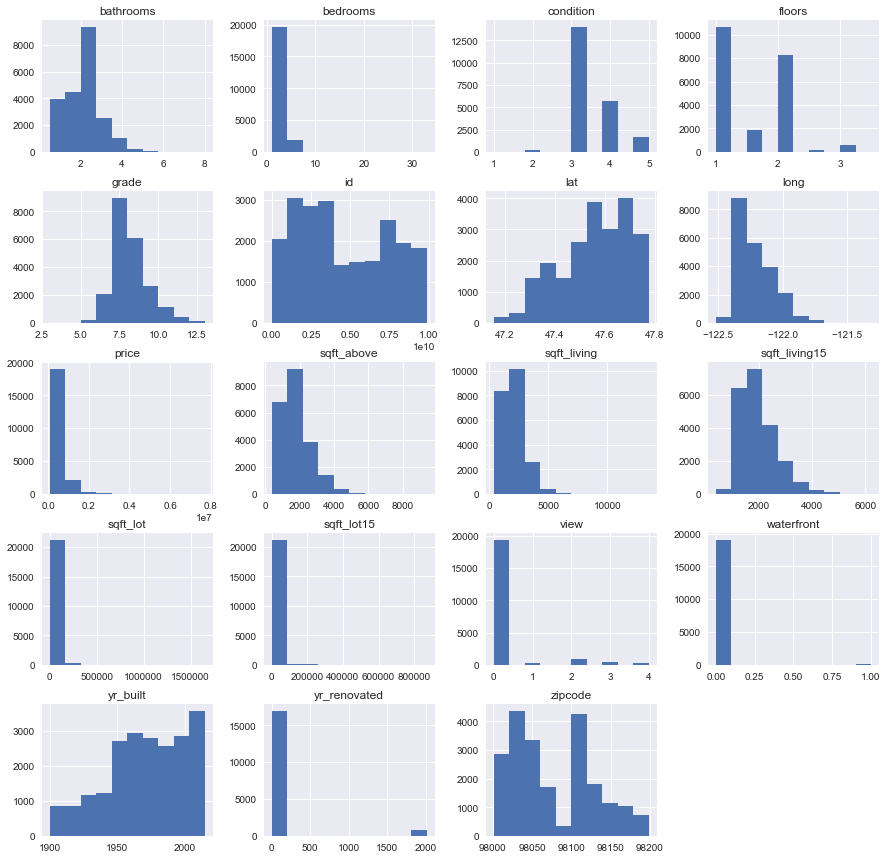

In [8]:
df.hist(figsize=(15, 15))

In [ ]:
#pd.plotting.scatter_matrix(df, figsize=(20, 20));

1 step: remove lat and long as locations reserach will be conducted on the basis of zip codes

In [ ]:
df = df.drop(['lat', 'long'], axis=1)

In [ ]:
df.columns

we assume that view is not relevant for house prices --> remove view column

In [ ]:
df = df.drop(['view'], axis=1)

In [ ]:
df.columns

remove id --> not a predictor

In [ ]:
df = df.drop(['id'], axis=1)

deal with year renovated column: the percentage of existing data on renovation year is too small compared to the size of data set: decided to drop the column for now

In [ ]:
df = df.drop(['yr_renovated'], axis=1)

sqft basements needed to be convirted to a float


In [ ]:
df.sqft_basement.unique()

In [ ]:
#replaced '?' values with defference in sdft_living and sqft_above
df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = df['sqft_living'] - df['sqft_above']


In [ ]:
#convert strings to floats
df.sqft_basement = df.sqft_basement.apply(lambda x: float(x))
df.info()

In [ ]:
df.columns

In [ ]:
df.corr()
df.corr().applymap(lambda x: True if abs(x)>0.75 else False)

Make seaborn heatmap to check for multicollinearity

In [ ]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})